# Machine Learning Major Project
# Uber Cab price prediction
# by chandan fulvariya  

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

Required for modeling

In [6]:
pip install scikit-plot

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,LogisticRegression,ElasticNet

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# for model selection and validation

from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score,f1_score,classification_report,roc_curve,auc,precision_recall_curve,average_precision_score

from sklearn.metrics import roc_curve

import scikitplot
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_precision_recall

<function scikitplot.metrics.plot_precision_recall(y_true, y_probas, title='Precision-Recall Curve', plot_micro=True, classes_to_plot=None, ax=None, figsize=None, cmap='nipy_spectral', title_fontsize='large', text_fontsize='medium')>

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn import metrics

# used for encoding and feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression

In [9]:
# fig. size in inches for seaborn
sns.set(rc={'figure.figsize':(16.5,3.52)})

#fig size in inches
rcParams['figure.figsize'] = 11.7,8.27

import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style ='whitegrid')

Import Dataset


In [13]:
from google.colab import files

# This will prompt you to upload the file
uploaded = files.upload()

In [14]:
uber_data=pd.read_csv('/content/cab_rides (1).csv')

In [15]:
from google.colab import files


uploaded = files.upload()


Saving weather.csv to weather.csv


In [16]:
uber_data.head() #check if the file is imported or not

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [17]:
weather_data=pd.read_csv('/content/weather.csv')

In [18]:
weather_data.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


Transformation of Data

In [19]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [20]:
uber_data.shape

(693071, 10)

In [21]:
uber_data.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [22]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [23]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [24]:
weather_data.isnull().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [25]:
#Removing rows for missing price

uber_data.dropna(subset=['price'],inplace=True)

uber_data.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
dtype: int64

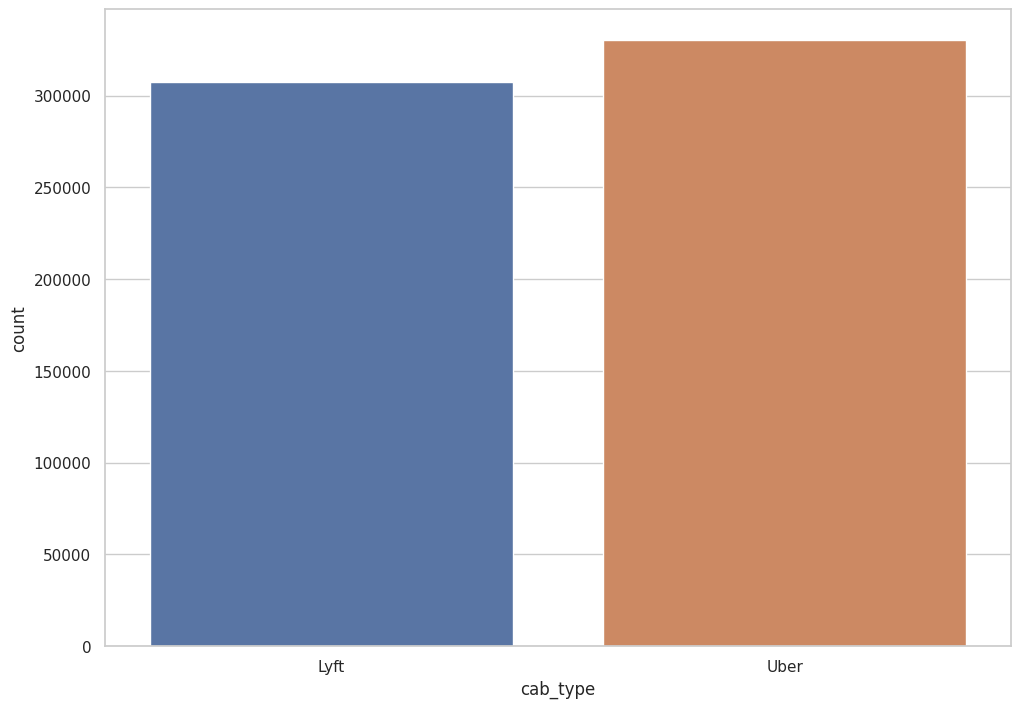

In [26]:
#new data cab type plot bar

ax=sns.countplot(data=uber_data, x='cab_type')

In [27]:
uber_data =uber_data.loc[uber_data['cab_type']=='Uber']

We drop rain collumn as there was no rain entire year. therefore it has missing values. We remove it as to avoid errors in prediction.

In [28]:
weather_data =weather_data.drop('rain',1)


Convering timeStamp to Date time format for better analysis and modeling.

In [29]:
from datetime import datetime,date
uber_data['datetime']=pd.to_datetime(uber_data['time_stamp'],unit='ms', infer_datetime_format=True)
weather_data['date_time']=pd.to_datetime(weather_data['time_stamp'],unit='s',infer_datetime_format=True)

In [30]:
uber_data['Udate'] =uber_data.datetime.dt.date

In [31]:
weather_data['Wdate'] = weather_data.date_time.dt.date

In [32]:
uber_data.describe()

,distance,time_stamp,price,surge_multiplier
count,330568.000000,3.305680e+05,330568.000000,330568.0
mean,2.191386,1.544046e+12,15.795343,1.0
std,1.178973,6.897122e+08,8.560300,0.0
min,0.020000,1.543204e+12,4.500000,1.0
25%,1.300000,1.543444e+12,9.000000,1.0
50%,2.170000,1.543737e+12,12.500000,1.0
75%,2.840000,1.544828e+12,21.500000,1.0
max,7.860000,1.545161e+12,89.500000,1.0


In [33]:
weather_data.describe()

,temp,clouds,pressure,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,1.545159e+09,0.990000,18.180000


In [34]:
weather_data.loc[0:50,]

,temp,location,clouds,pressure,time_stamp,humidity,wind,date_time,Wdate
0,42.42,Back Bay,1.00,1012.14,1545003901,0.77,11.25,2018-12-16 23:45:01,2018-12-16
1,42.43,Beacon Hill,1.00,1012.15,1545003901,0.76,11.32,2018-12-16 23:45:01,2018-12-16
2,42.50,Boston University,1.00,1012.15,1545003901,0.76,11.07,2018-12-16 23:45:01,2018-12-16
3,42.11,Fenway,1.00,1012.13,1545003901,0.77,11.09,2018-12-16 23:45:01,2018-12-16
4,43.13,Financial District,1.00,1012.14,1545003901,0.75,11.49,2018-12-16 23:45:01,2018-12-16
5,42.34,Haymarket Square,1.00,1012.15,1545003901,0.77,11.49,2018-12-16 23:45:01,2018-12-16
6,42.36,North End,1.00,1012.15,1545003901,0.77,11.46,2018-12-16 23:45:01,2018-12-16
7,42.21,North Station,1.00,1012.16,1545003901,0.77,11.37,2018-12-16 23:45:01,2018-12-16
8,42.07,Northeastern University,1.00,1012.12,1545003901,0.78,11.28,2018-12-16 23:45:01,2018-12-16
9,43.05,South Station,1.00,1012.12,1545003901,0.75,11.58,2018-12-16 23:45:01,2018-12-16


#Merging two Datasets


In [36]:
uber_data_Temp = uber_data.sample(n =30000,random_state = 15357)

Concatinating two datasts into one for modeling


In [38]:
uber_data_Temp = uber_data.sample(n = 30000, random_state = 26738)

## Concatinating two datasets into one for modeling.

UberWeather = pd.merge(uber_data_Temp, weather_data, how='inner', left_on=['Udate','destination'], right_on=['Wdate','location'])

In [39]:
UberWeather.shape

UberWeather.head()

,distance,cab_type,time_stamp_x,destination,source,price,surge_multiplier,id,product_id,name,...,Udate,temp,location,clouds,pressure,time_stamp_y,humidity,wind,date_time,Wdate
0,2.67,Uber,1543768085230,Financial District,Northeastern University,7.5,1.0,172c12a7-5370-40e2-a376-4a8a2fcfe3b3,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,...,2018-12-02,39.28,Financial District,1.0,1019.54,1543740774,0.86,4.10,2018-12-02 08:52:54,2018-12-02
1,2.67,Uber,1543768085230,Financial District,Northeastern University,7.5,1.0,172c12a7-5370-40e2-a376-4a8a2fcfe3b3,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,...,2018-12-02,51.89,Financial District,1.0,1003.10,1543783974,0.91,3.66,2018-12-02 20:52:54,2018-12-02
2,2.67,Uber,1543768085230,Financial District,Northeastern University,7.5,1.0,172c12a7-5370-40e2-a376-4a8a2fcfe3b3,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,...,2018-12-02,51.75,Financial District,1.0,1003.25,1543787574,0.90,3.95,2018-12-02 21:52:54,2018-12-02
3,2.67,Uber,1543768085230,Financial District,Northeastern University,7.5,1.0,172c12a7-5370-40e2-a376-4a8a2fcfe3b3,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,...,2018-12-02,48.86,Financial District,1.0,1002.89,1543794774,0.92,4.01,2018-12-02 23:52:54,2018-12-02
4,2.67,Uber,1543768085230,Financial District,Northeastern University,7.5,1.0,172c12a7-5370-40e2-a376-4a8a2fcfe3b3,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,...,2018-12-02,45.08,Financial District,1.0,1012.22,1543765974,0.94,6.37,2018-12-02 15:52:54,2018-12-02


In [40]:
UberWeather.isnull().sum()

distance            0
cab_type            0
time_stamp_x        0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
datetime            0
Udate               0
temp                0
location            0
clouds              0
pressure            0
time_stamp_y        0
humidity            0
wind                0
date_time           0
Wdate               0
dtype: int64

#Feature Engineering


In [41]:
UberWeather['Wweek'] = UberWeather.date_time.dt.day_of_week

UberWeather['Whour'] = UberWeather.date_time.dt.hour

In [ ]:
UberWeather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1160058 entries, 0 to 1160057
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   distance          1160058 non-null  float64       
 1   cab_type          1160058 non-null  object        
 2   time_stamp_x      1160058 non-null  int64         
 3   destination       1160058 non-null  object        
 4   source            1160058 non-null  object        
 5   price             1160058 non-null  float64       
 6   surge_multiplier  1160058 non-null  float64       
 7   id                1160058 non-null  object        
 8   product_id        1160058 non-null  object        
 9   name              1160058 non-null  object        
 10  datetime          1160058 non-null  datetime64[ns]
 11  Udate             1160058 non-null  object        
 12  temp              1160058 non-null  float64       
 13  location          1160058 non-null  object

In [42]:
UberWeather.surge_multiplier = pd.to_numeric(UberWeather.surge_multiplier)

<Axes: >

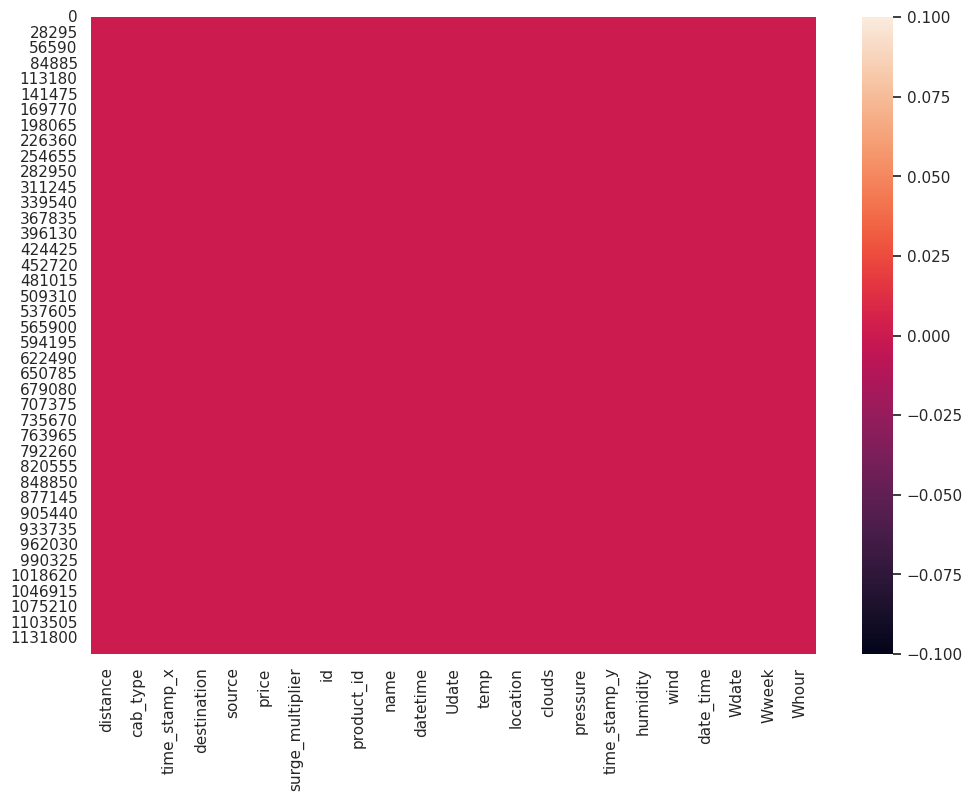

In [43]:
sns.heatmap(UberWeather.isnull())

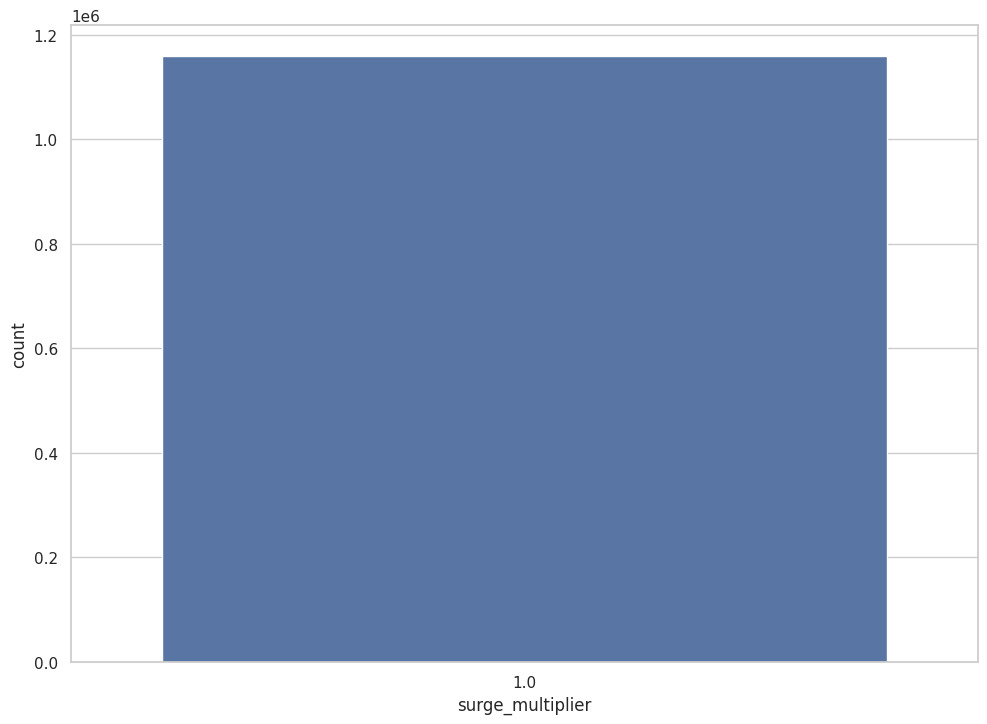

In [44]:
UberWeather .fillna(0,inplace=True)

ax = sns.countplot(data=UberWeather, x ='surge_multiplier')

In [ ]:
UberWeather .columns

Index(['distance', 'cab_type', 'time_stamp_x', 'destination', 'source',
       'price', 'surge_multiplier', 'id', 'product_id', 'name', 'datetime',
       'Udate', 'temp', 'location', 'clouds', 'pressure', 'time_stamp_y',
       'humidity', 'wind', 'date_time', 'Wdate', 'Wweek', 'Whour'],
      dtype='object')

In [ ]:
UberWeather.groupby('cab_type').count()

,distance,time_stamp_x,destination,source,price,surge_multiplier,id,product_id,name,datetime,...,location,clouds,pressure,time_stamp_y,humidity,wind,date_time,Wdate,Wweek,Whour
cab_type,,,,,,,,,,,,,,,,,,,,,
Uber,1160058,1160058,1160058,1160058,1160058,1160058,1160058,1160058,1160058,1160058,...,1160058,1160058,1160058,1160058,1160058,1160058,1160058,1160058,1160058,1160058



#Explotary Data Analysis with final dataset.

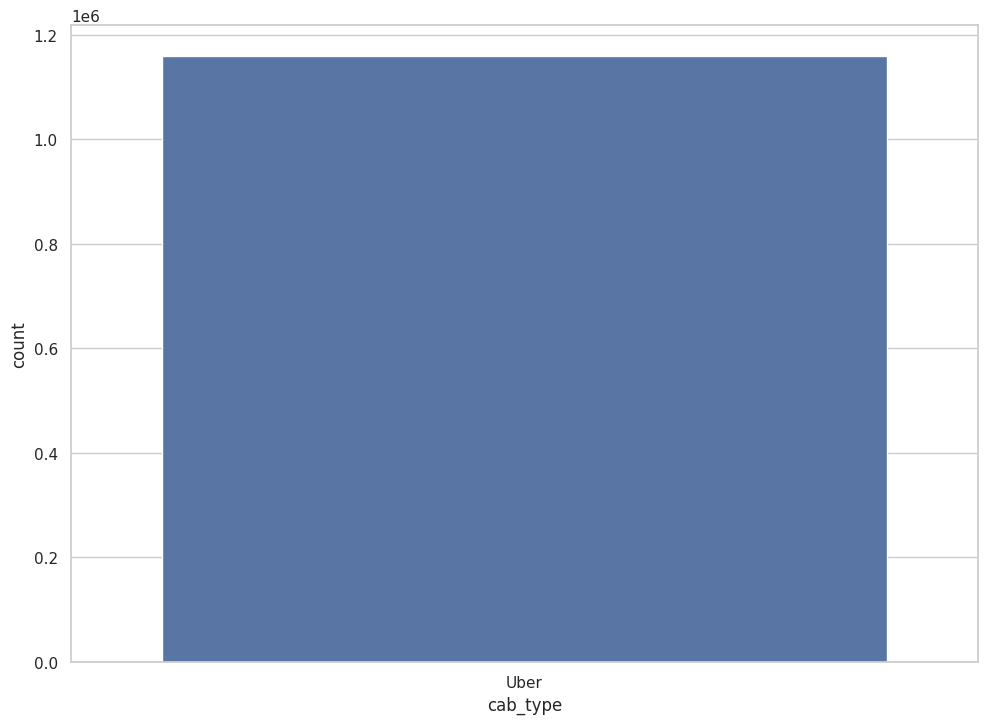

In [ ]:
#new data cab type plot bar

ax= sns.countplot(data=UberWeather, x='cab_type')

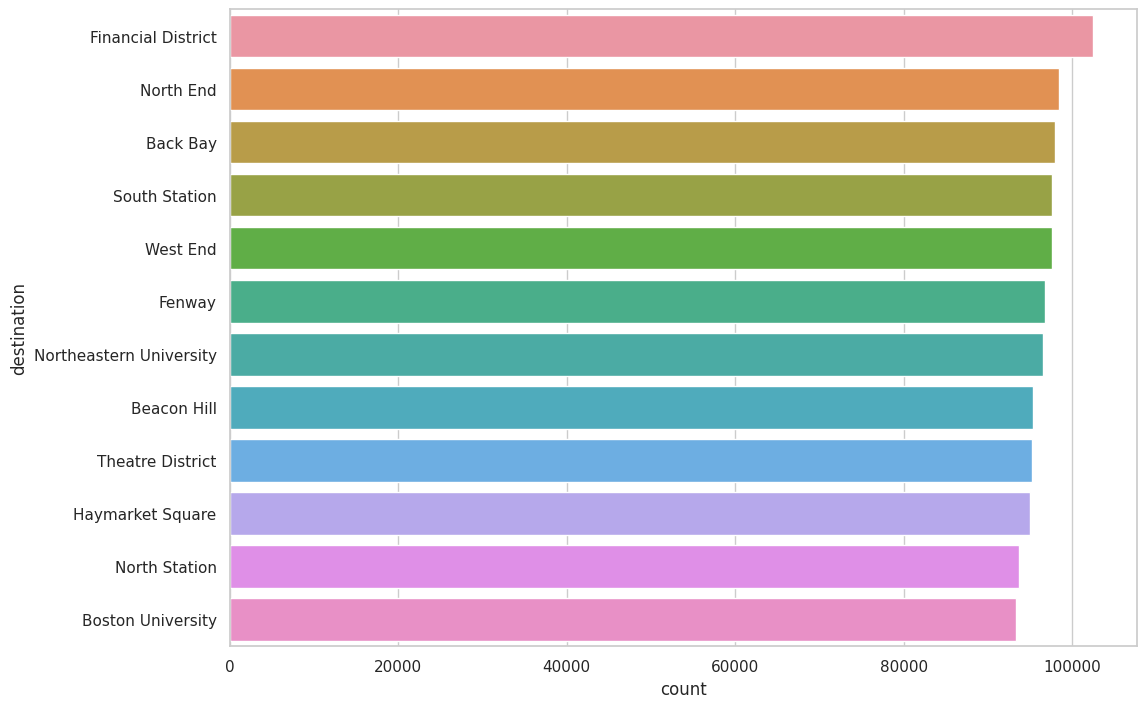

In [ ]:
ax = sns.countplot(data=UberWeather, y='destination',order = UberWeather.destination.value_counts().index)

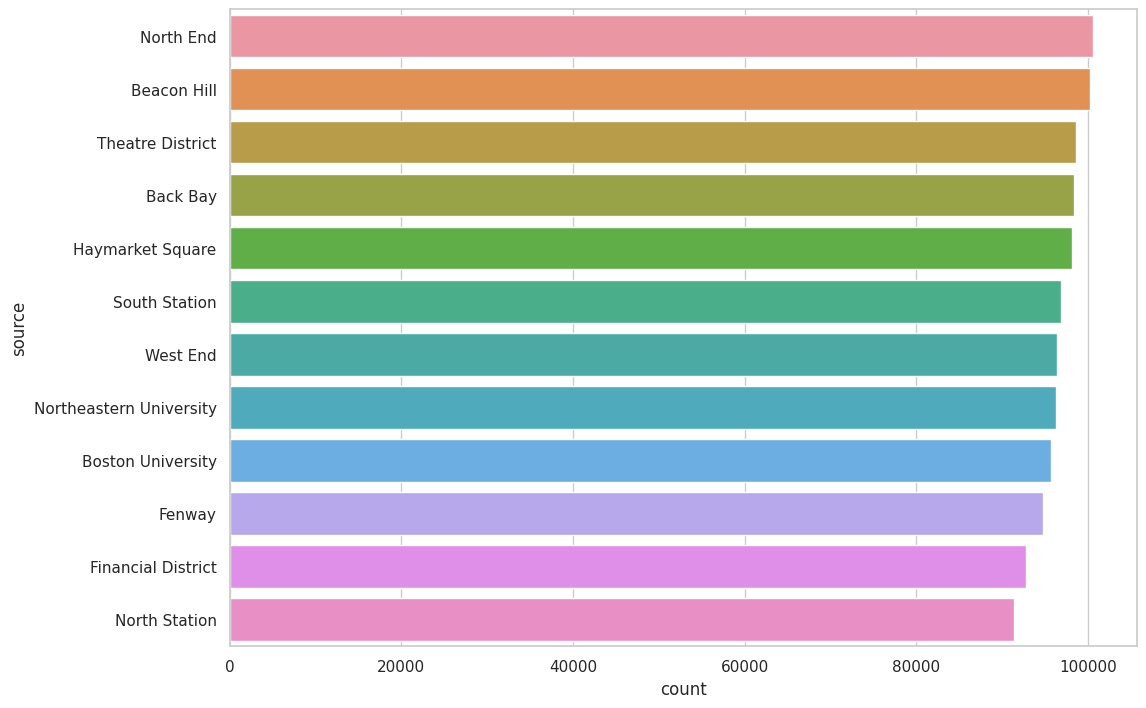

In [ ]:
ax = sns.countplot(data=UberWeather, y='source', order = UberWeather.source.value_counts().index)

<Figure size 1000x1000 with 0 Axes>

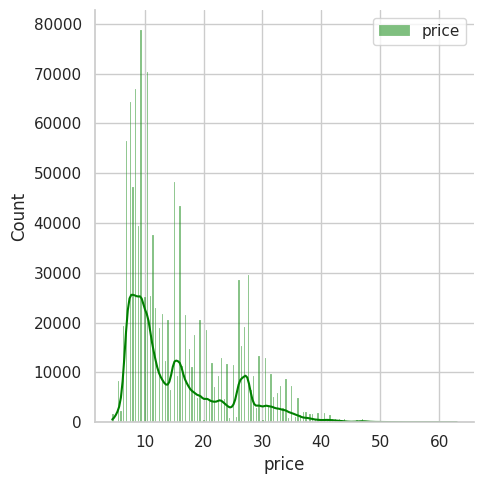

In [ ]:
 fig = plt.figure(figsize=(10,10))

 sns.displot(UberWeather.price,color='green',label='price',kde=True)
 plt.legend();

<Figure size 1200x1200 with 0 Axes>

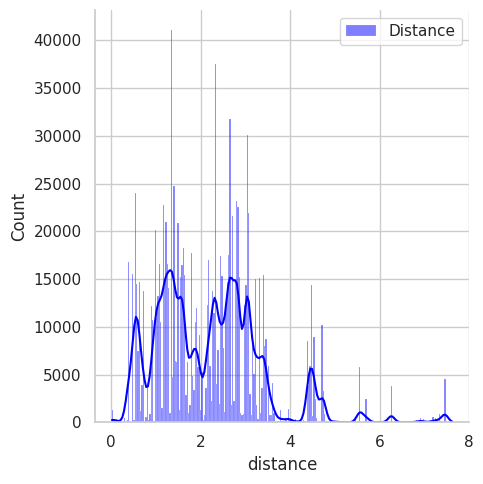

In [ ]:
fig =plt.figure(figsize=(12,12))
sns.displot(UberWeather.distance,color='blue',label='Distance',kde=True)
plt.legend();

<Figure size 1000x1000 with 0 Axes>

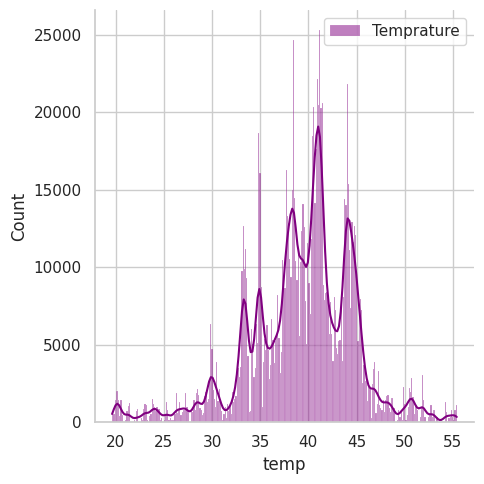

In [ ]:
fig =plt.figure(figsize=(10,10))
sns.displot(UberWeather.temp,color='purple',label ='Temprature',kde=True)
plt.legend();

<Figure size 500x500 with 0 Axes>

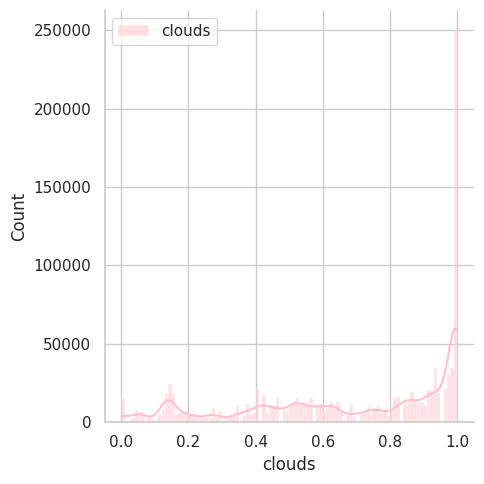

In [ ]:
fig =plt.figure(figsize=(5,5))
sns.displot(UberWeather.clouds, color='pink',label='clouds',kde='true')
plt.legend();

<Figure size 500x400 with 0 Axes>

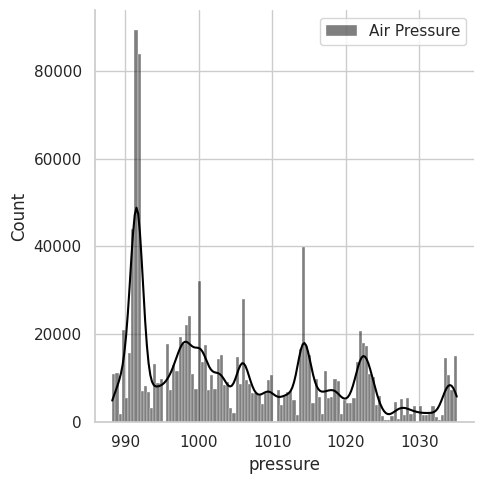

In [ ]:
fig = plt.figure(figsize=(5,4))

sns.displot(UberWeather.pressure,color='black',label='Air Pressure',kde =True)
plt.legend();

<Figure size 500x500 with 0 Axes>

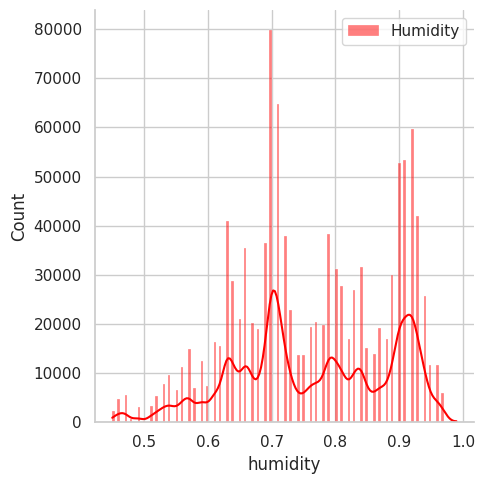

In [ ]:
fig =plt.figure(figsize=(5,5))
sns.displot(UberWeather.humidity, color ='red', label='Humidity',kde =True)

plt.legend();


<Figure size 500x500 with 0 Axes>

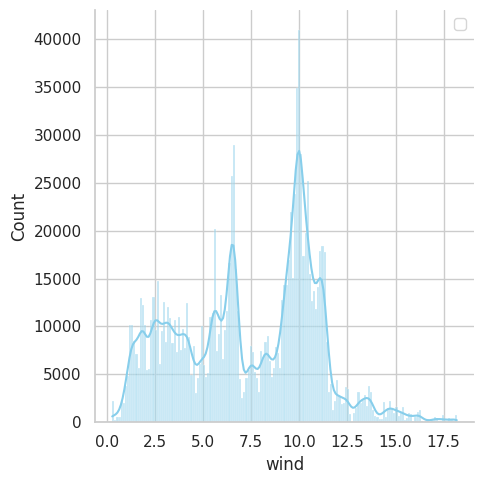

In [ ]:
fig =plt.figure(figsize=(5,5))
sns.displot(UberWeather.wind,color='skyblue',kde =True)
plt.legend();


<Figure size 500x500 with 0 Axes>

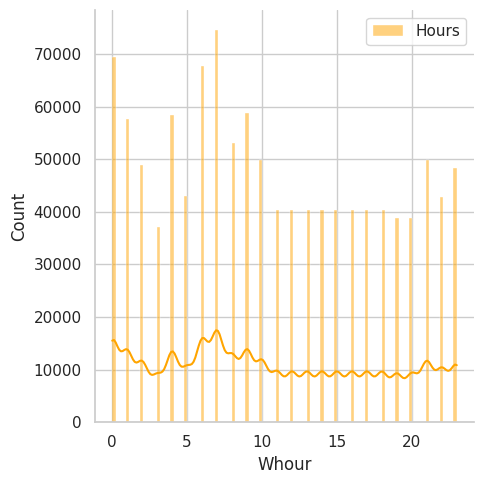

In [ ]:
fig =plt.figure(figsize=(5,5))
sns.displot(UberWeather.Whour, color='orange',label='Hours', kde=True)
plt.legend();


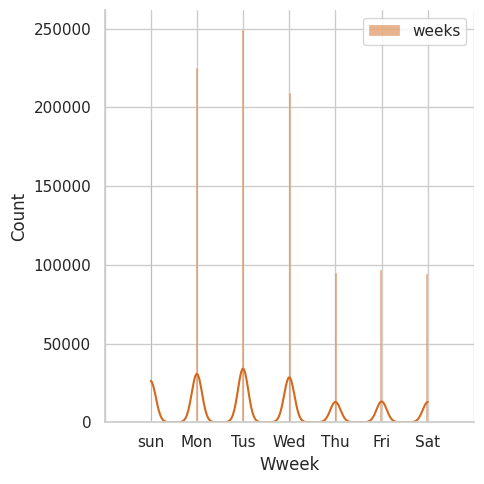

In [ ]:
s = sns.displot(UberWeather.Wweek, color='chocolate',label ='weeks',kde=True)
s.set_xticklabels(['','sun','Mon','Tus','Wed','Thu','Fri','Sat',''])
plt.legend();

<Axes: xlabel='Whour', ylabel='price'>

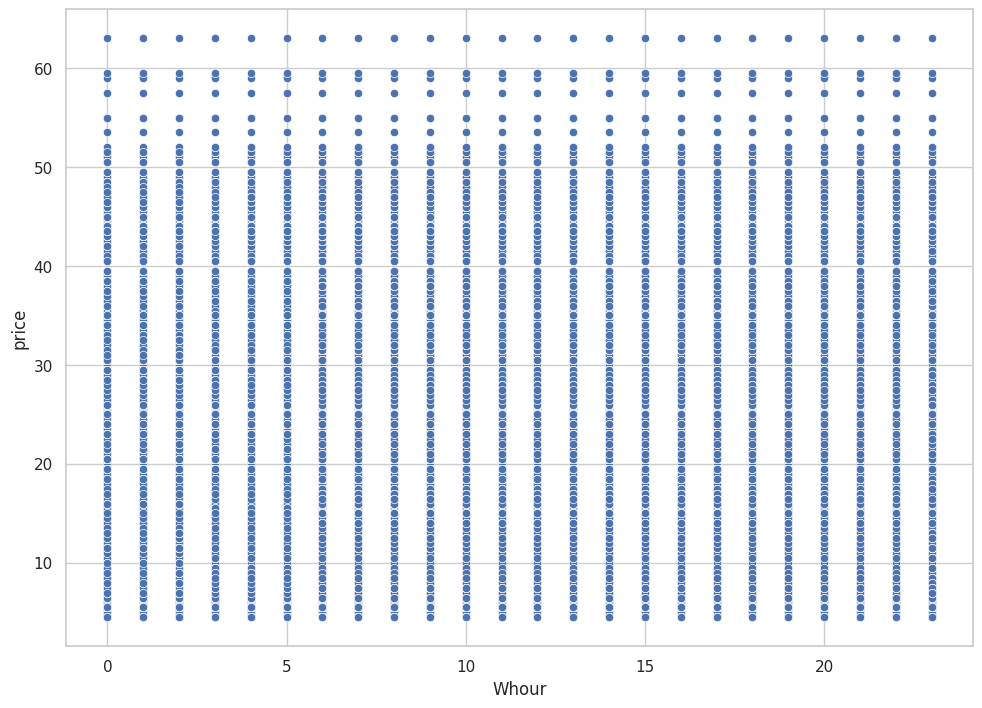

In [ ]:
sns.scatterplot(data=UberWeather, x='Whour', y='price')


<Axes: xlabel='Wweek', ylabel='price'>

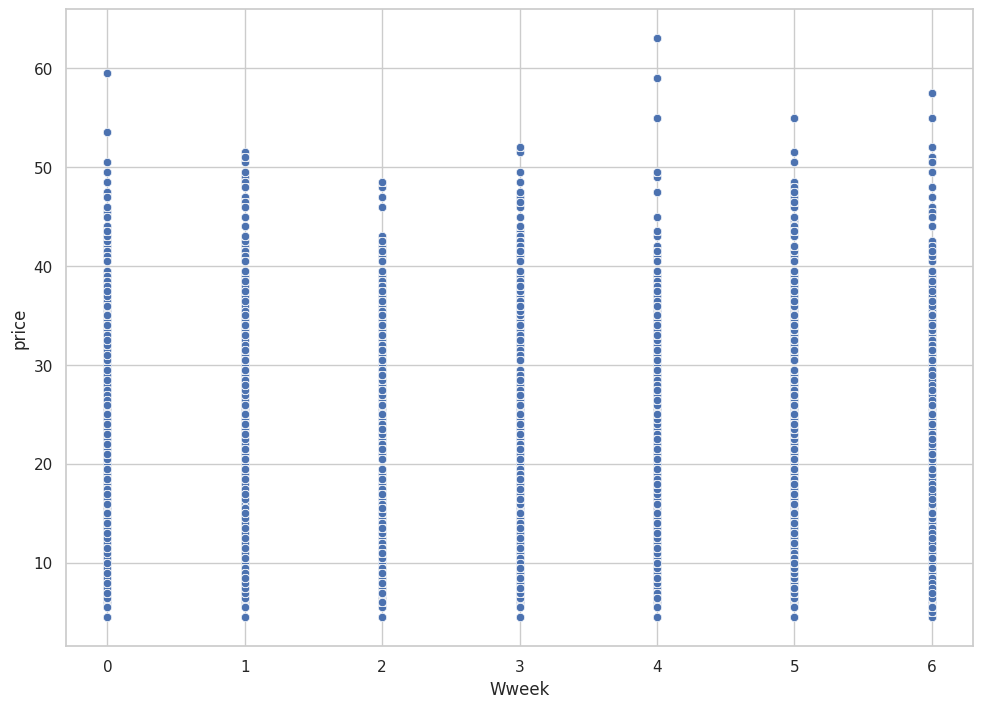

In [ ]:
sns.scatterplot(data=UberWeather, x ='Wweek',y='price')

<Axes: xlabel='distance', ylabel='price'>

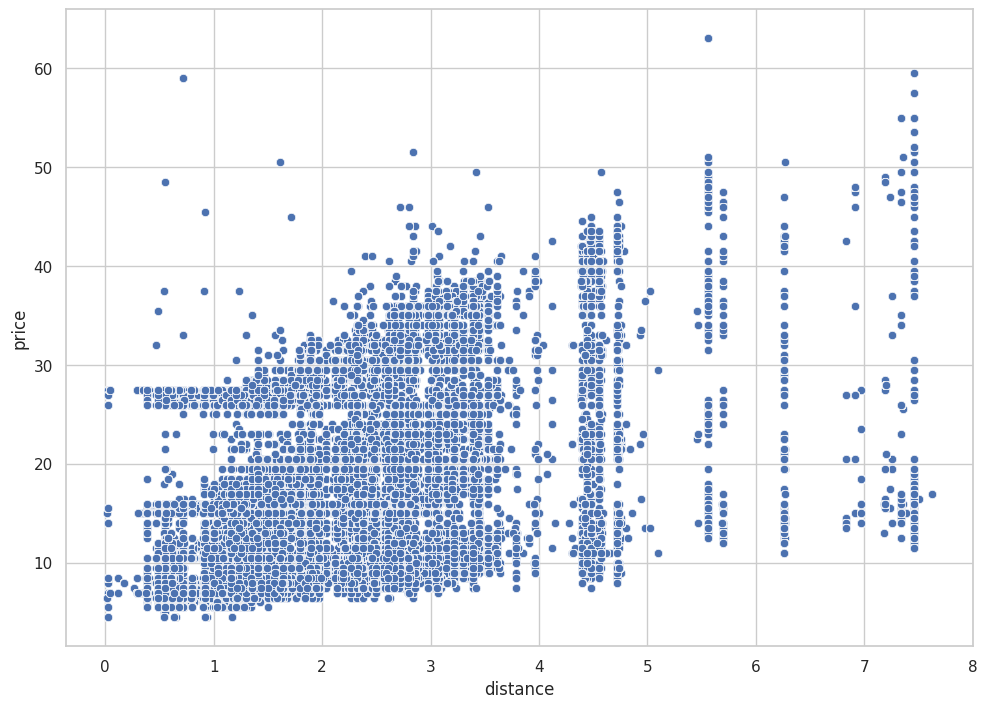

In [ ]:
sns.scatterplot(data=UberWeather,x='distance',y='price')

<Axes: xlabel='temp', ylabel='price'>

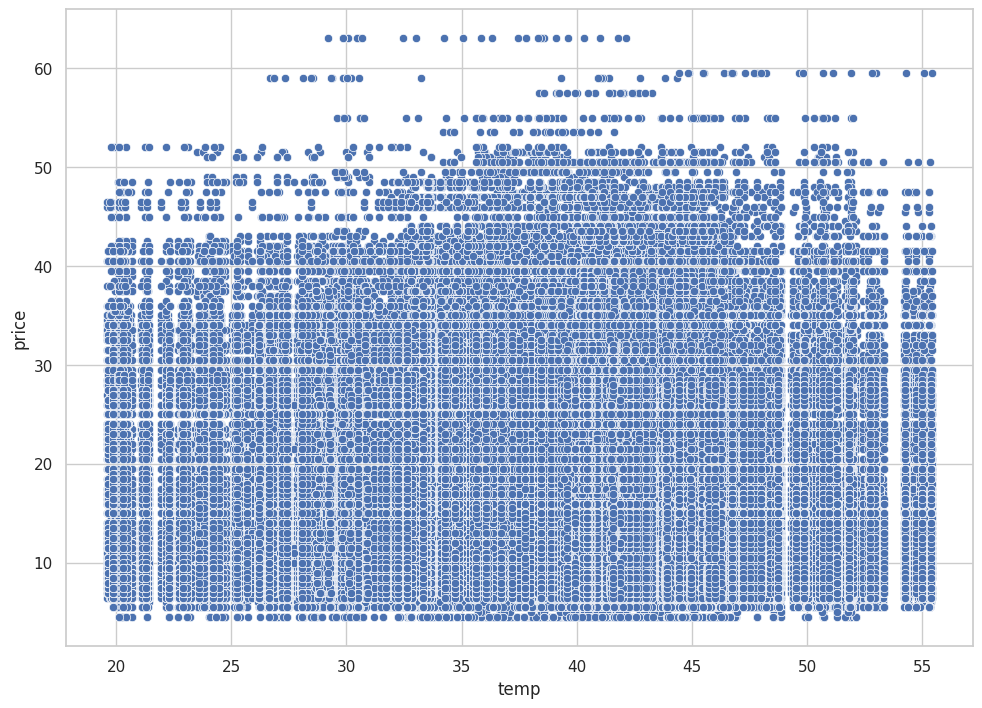

In [ ]:
sns.scatterplot(data=UberWeather, x="temp", y="price")

<Axes: xlabel='clouds', ylabel='price'>

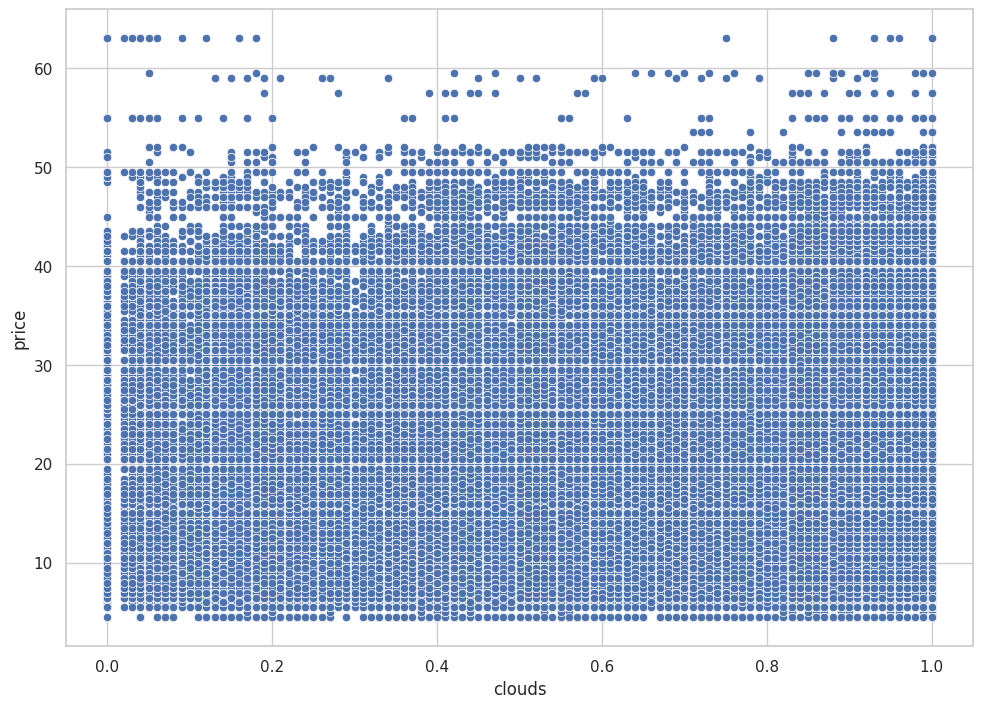

In [ ]:
sns.scatterplot(data=UberWeather, x="clouds", y="price")

<Axes: xlabel='pressure', ylabel='price'>

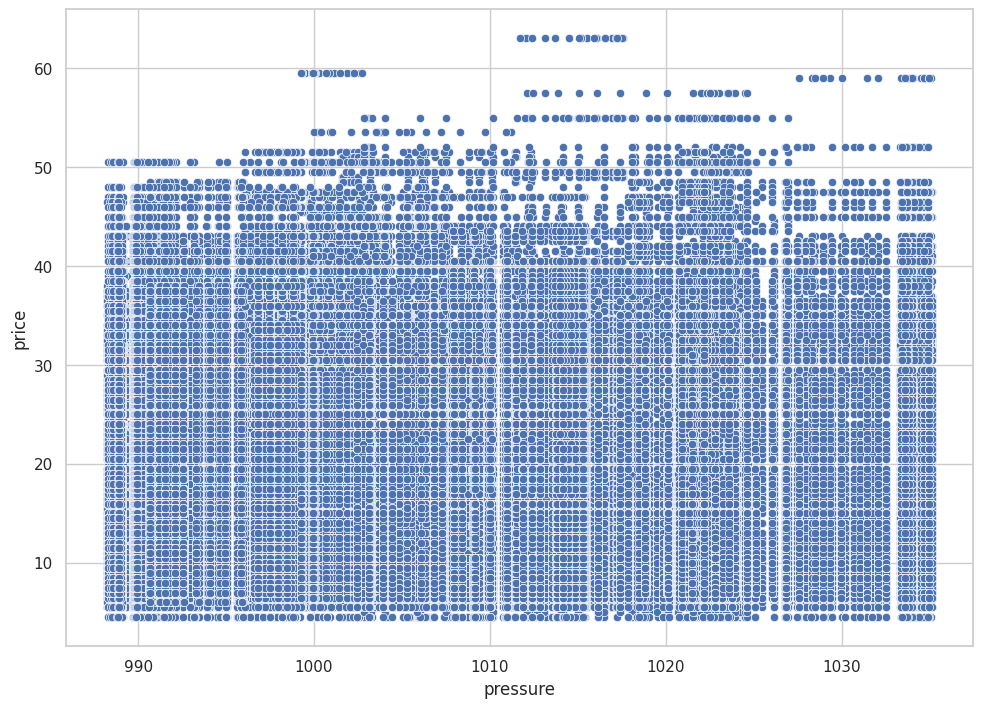

In [ ]:
sns.scatterplot(data=UberWeather, x="pressure", y="price")

<Axes: xlabel='humidity', ylabel='price'>

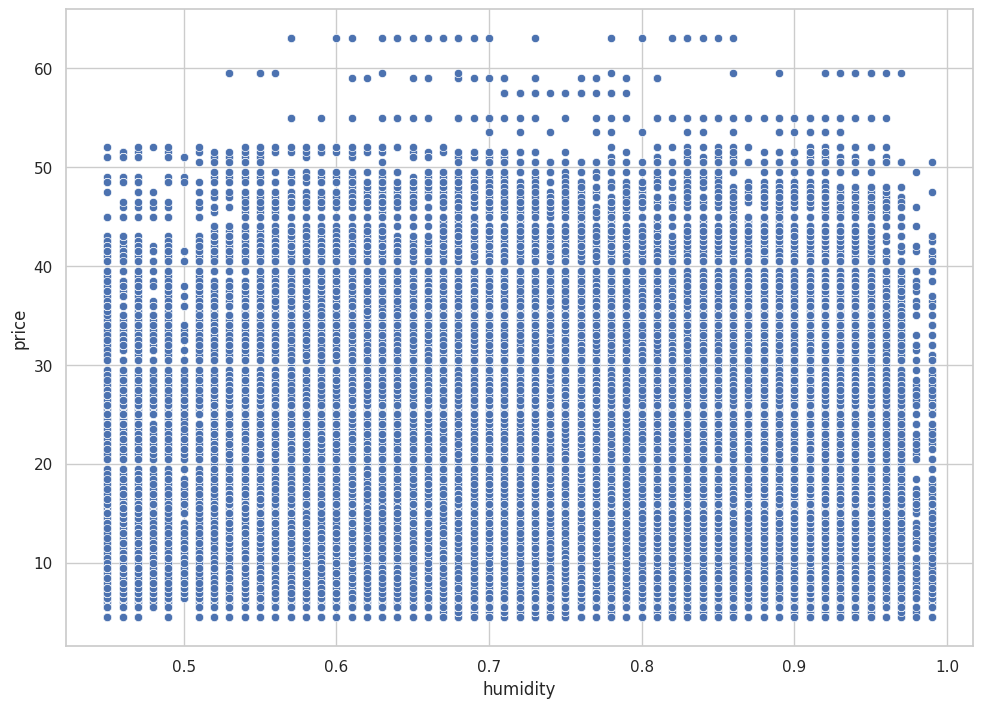

In [ ]:

sns.scatterplot(data=UberWeather, x="humidity", y="price")


<Axes: xlabel='wind', ylabel='price'>

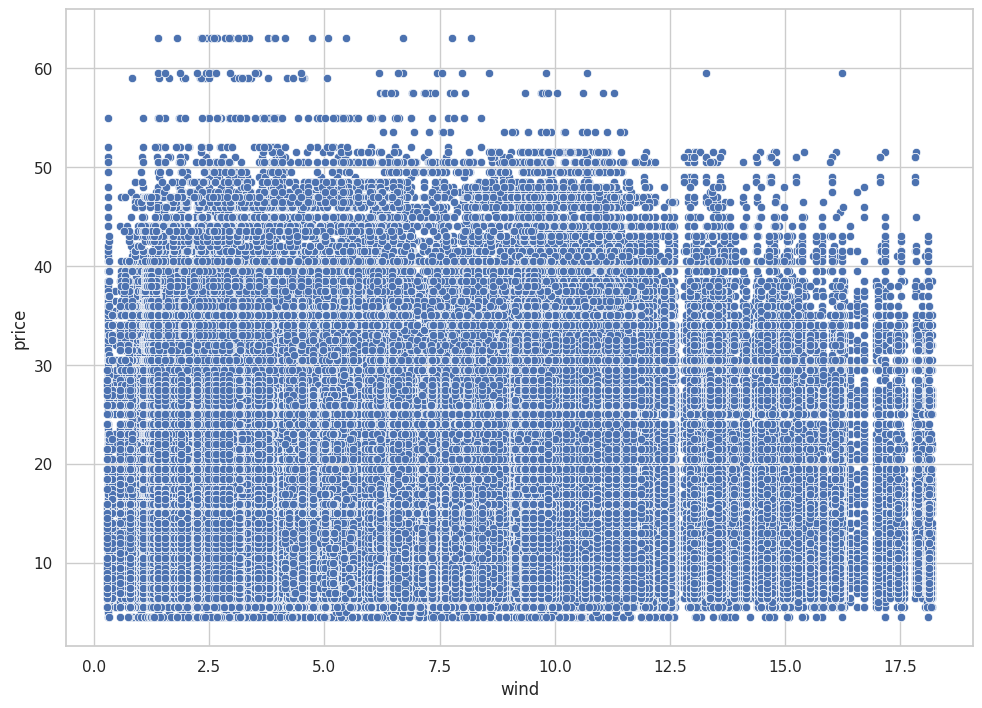

In [ ]:
sns.scatterplot(data=UberWeather, x="wind", y="price")


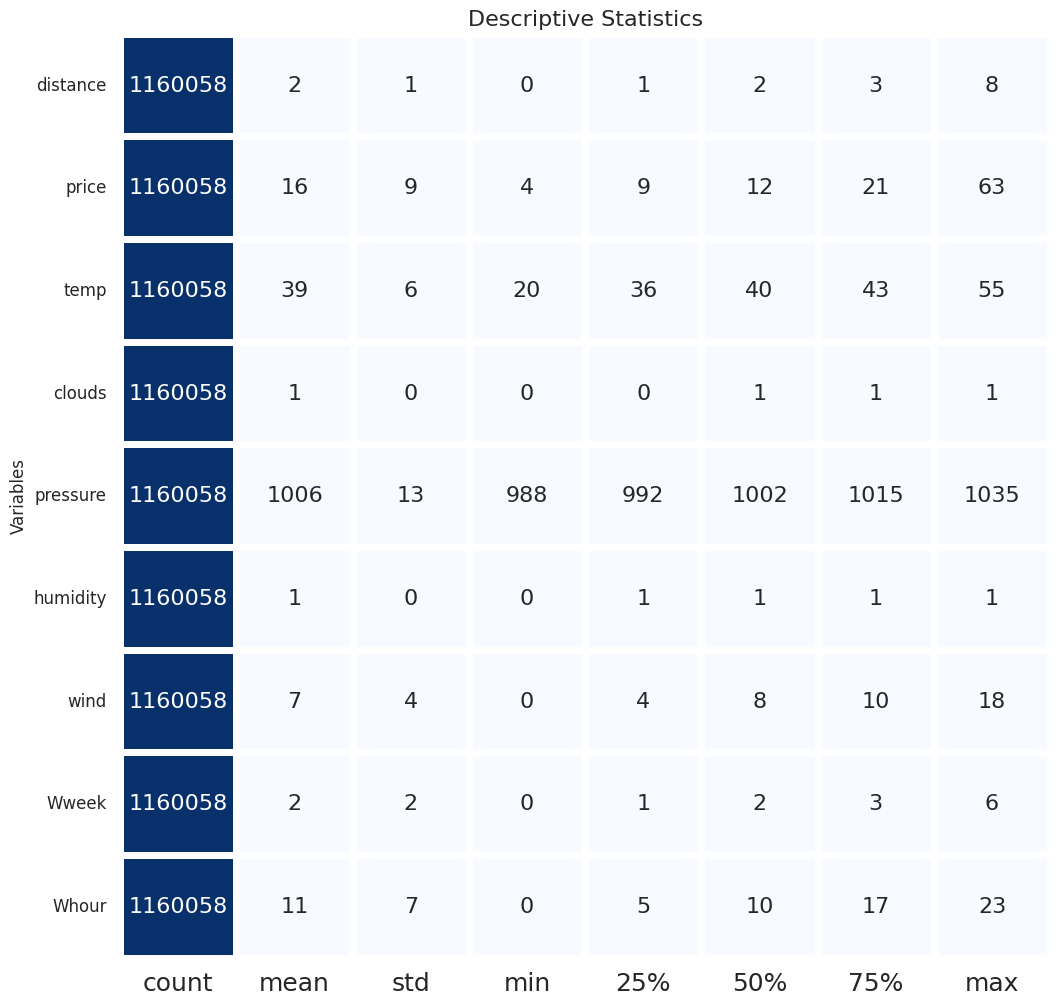

In [ ]:
desc = UberWeather.describe().T
df1 = pd.DataFrame(index=['distance', 'price',
                          'temp', 'clouds', 'pressure', 'humidity', 'wind',
                           'Wweek', 'Whour'],
                   columns= ["count","mean","std","min",
                             "25%","50%","75%","max"], data= desc )

f,ax = plt.subplots(figsize=(12,12))

sns.heatmap(df1, annot=True,cmap = "Blues", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,
            annot_kws={"size": 16})

plt.xticks(size = 18)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Variables")
plt.title("Descriptive Statistics", size = 16)
plt.show()

#Feature Engineering


In [ ]:
UberWeather .columns

Index(['distance', 'cab_type', 'time_stamp_x', 'destination', 'source',
       'price', 'surge_multiplier', 'id', 'product_id', 'name', 'datetime',
       'Udate', 'temp', 'location', 'clouds', 'pressure', 'time_stamp_y',
       'humidity', 'wind', 'date_time', 'Wdate', 'Wweek', 'Whour'],
      dtype='object')

In [ ]:
# Here we encode data by remapping it to numeric values so its easier for the model to process and be more efficient.
UberMod = UberWeather.drop(['cab_type','time_stamp_x','id','product_id','datetime','Udate','time_stamp_y','date_time'], axis=1)

In [ ]:
UberMod

,distance,destination,source,price,surge_multiplier,name,temp,location,clouds,pressure,humidity,wind,Wdate,Wweek,Whour
0,2.67,Financial District,Northeastern University,7.5,1.0,UberPool,39.28,Financial District,1.00,1019.54,0.86,4.10,2018-12-02,6,8
1,2.67,Financial District,Northeastern University,7.5,1.0,UberPool,51.89,Financial District,1.00,1003.10,0.91,3.66,2018-12-02,6,20
2,2.67,Financial District,Northeastern University,7.5,1.0,UberPool,51.75,Financial District,1.00,1003.25,0.90,3.95,2018-12-02,6,21
3,2.67,Financial District,Northeastern University,7.5,1.0,UberPool,48.86,Financial District,1.00,1002.89,0.92,4.01,2018-12-02,6,23
4,2.67,Financial District,Northeastern University,7.5,1.0,UberPool,45.08,Financial District,1.00,1012.22,0.94,6.37,2018-12-02,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160053,0.39,South Station,Financial District,5.5,1.0,UberPool,29.79,South Station,0.20,1022.81,0.59,5.56,2018-12-09,6,23
1160054,3.45,South Station,Back Bay,24.0,1.0,Black,29.77,South Station,0.20,1022.80,0.59,5.59,2018-12-09,6,23
1160055,3.45,South Station,Back Bay,24.0,1.0,Black,29.79,South Station,0.20,1022.81,0.59,5.56,2018-12-09,6,23
1160056,1.62,Back Bay,Northeastern University,16.5,1.0,Black,30.85,Back Bay,0.21,1022.81,0.57,5.51,2018-12-09,6,23


#Model Building

Here we encode data by remapping it to numeric values so its easier for the model to process and be more efficient.


In [ ]:
le = LabelEncoder()
UberMod.destination = le.fit_transform(UberMod.destination)

UberMod.source = le.fit_transform(UberMod.source)

UberMod.name = le.fit_transform(UberMod.name)

UberMod.location = le.fit_transform(UberMod.location)

UberMod.Wdate = le.fit_transform(UberMod.Wdate)

UberMod.price = le.fit_transform(UberMod.price)

In [ ]:
UberMod

,distance,destination,source,price,surge_multiplier,name,temp,location,clouds,pressure,humidity,wind,Wdate,Wweek,Whour
0,2.67,Financial District,Northeastern University,7.5,1.0,UberPool,39.28,Financial District,1.00,1019.54,0.86,4.10,2018-12-02,6,8
1,2.67,Financial District,Northeastern University,7.5,1.0,UberPool,51.89,Financial District,1.00,1003.10,0.91,3.66,2018-12-02,6,20
2,2.67,Financial District,Northeastern University,7.5,1.0,UberPool,51.75,Financial District,1.00,1003.25,0.90,3.95,2018-12-02,6,21
3,2.67,Financial District,Northeastern University,7.5,1.0,UberPool,48.86,Financial District,1.00,1002.89,0.92,4.01,2018-12-02,6,23
4,2.67,Financial District,Northeastern University,7.5,1.0,UberPool,45.08,Financial District,1.00,1012.22,0.94,6.37,2018-12-02,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160053,0.39,South Station,Financial District,5.5,1.0,UberPool,29.79,South Station,0.20,1022.81,0.59,5.56,2018-12-09,6,23
1160054,3.45,South Station,Back Bay,24.0,1.0,Black,29.77,South Station,0.20,1022.80,0.59,5.59,2018-12-09,6,23
1160055,3.45,South Station,Back Bay,24.0,1.0,Black,29.79,South Station,0.20,1022.81,0.59,5.56,2018-12-09,6,23
1160056,1.62,Back Bay,Northeastern University,16.5,1.0,Black,30.85,Back Bay,0.21,1022.81,0.57,5.51,2018-12-09,6,23



Here we begin with our modelling. We seperate the dependent variable from the independent ones.

In [ ]:
X = UberMod.drop('price',axis=1)
Y = UberMod['price']

#X=UberWeather[['distance','temp','clouds','humidity','pressure','day','hour','rain', 'surge_multiplier']]
#Y=UberWeather['price']

One seperation is done we split the data for treaning and testing. We used the traditional ratio 7:3 for our train and test Respectively.


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.33,random_state=12345)

In [ ]:
print('DataFrame Shape:', UberMod.shape)
print('*'*25)
print('X Train Shape:', X_train.shape)
print('*'*25)
print('X Test Shape:', X_test.shape)
print('*'*25)
print('Y Train Shape:', y_train.shape)
print('*'*25)
print('Y Test Shape:', y_test.shape)


DataFrame Shape: (1160058, 15)
*************************
X Train Shape: (777238, 14)
*************************
X Test Shape: (382820, 14)
*************************
Y Train Shape: (777238,)
*************************
Y Test Shape: (382820,)


There are several algorithmns we will use LinearRegression as its best and fastest with satisfactory results.

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
pred=model.predict(X_test)

In [ ]:
pred

array([10.44282321, 36.34412425, 30.79495858, ...,  8.46986598,
       36.64809606, 16.21139703])

In [ ]:
data=pd.DataFrame({'Actual Data': y_test, 'Prediction Data': pred})

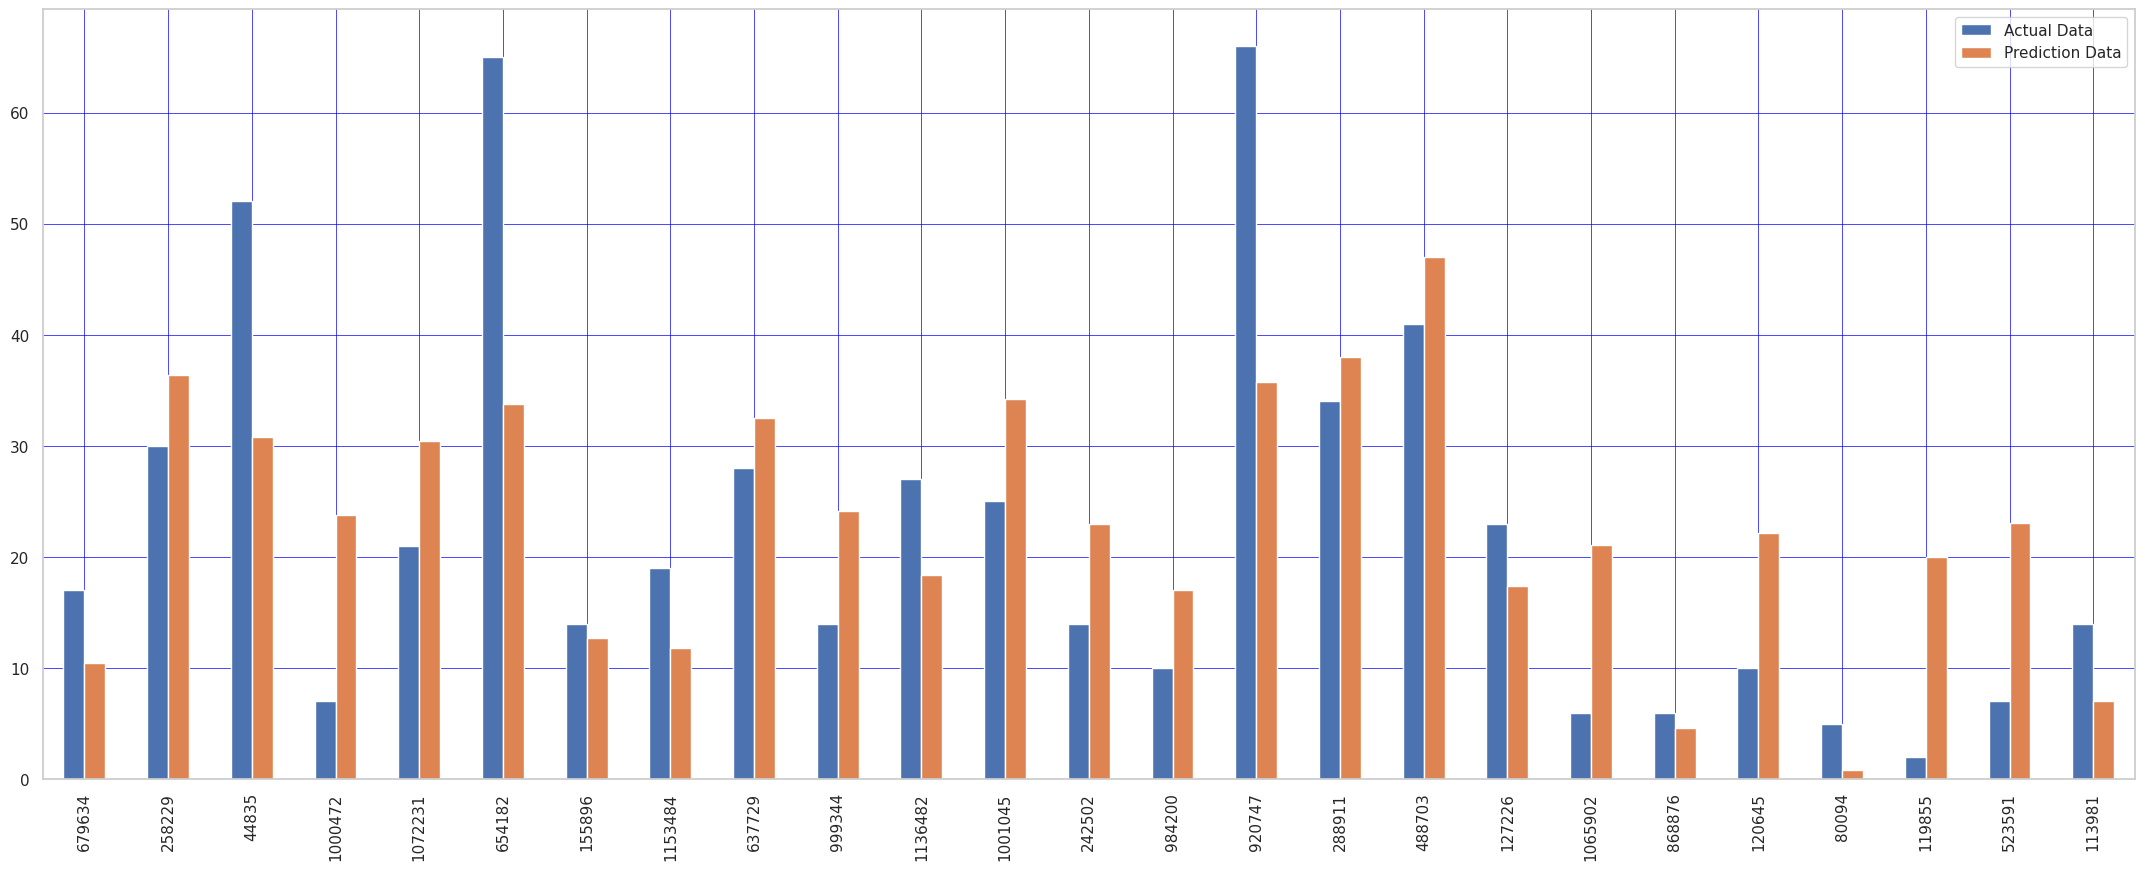

In [ ]:
data1=data.head(25)
data1.plot(kind='bar',figsize=(27,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='blue')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

In [ ]:
# instantiate the model
reg = LinearRegression()

# call cross_val_score
cv_results = cross_val_score(reg, X_train, y_train, cv=5)

print(f'Scores: {np.round(cv_results, 3)}')
print(f'Scores mean: {np.round(np.mean(cv_results), 3)}')

Scores: [0.412 0.416 0.413 0.415 0.416]
Scores mean: 0.414


In [ ]:
def GetModels():
    models = []
    models.append(['XGBClassifier',XGBClassifier(learning_rate=0.1,
                                             objective='binary:logistic',
                                             random_state=0,eval_metric='mlogloss')])
    models.append(['Logistic Regression',LogisticRegression(random_state=0)])
    models.append(['SVM',SVC(random_state=0)])
    models.append(['KNeigbors',KNeighborsClassifier()])
    models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
    models.append(['RandomForest',RandomForestClassifier(random_state=0)])
    models.append(['AdaBoostClassifier',AdaBoostClassifier()])

#Checking Error

In [ ]:
error = np.sqrt(metrics.mean_absolute_error(y_test, pred))


In [ ]:
error

3.2559617387125335

#Regularized regression

Ridge Regression

In [ ]:

# instantiate the model
ridge = Ridge(alpha=0.1, normalize=True)

# fit the model
ridge.fit(X_train, y_train)

# predict on the test data
ridge_pred = ridge.predict(X_test)

# get the score
rs = ridge.score(X_test, y_test)

print(f'Ridge Score: {round(rs, 4)}')

NameError: ignored

Lasso regression

In [ ]:

# instantiate the regressor
lasso = Lasso(alpha=0.1, normalize=True)

# fit the model
lasso.fit(X_train, y_train)

# predict on the test data
lasso_pred = lasso.predict(X_test)

# get the score
ls = lasso.score(X_test, y_test)

print(f'Ridge Score: {round(ls, 4)}')

In [ ]:
def display_plot(cv_scores, cv_scores_std, alpha_space):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores, label='CV Scores')

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, color='violet', alpha=0.2, label='CV Score ± std error')
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5', label='Max CV Score')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


In [ ]:

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha

    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, Y, cv=10)

    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))

    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std, alpha_space)


#Fine tuning model

In [ ]:
# instantiate the model
knn = KNeighborsClassifier(n_neighbors=8)


# fit the training data
knn.fit(X_train, y_train)

# predict the labels fo the test set
y_pred = knn.predict(X_test)

# confusion_matrix
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n')

# classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Confusion Matrix:
[[380   0  60 ...   0   0   0]
 [  0   0  15 ...   0   0   0]
 [174   3 985 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.42      0.66      0.51       580
           1       0.00      0.00      0.00        42
           2       0.31      0.36      0.33      2711
           3       0.07      0.03      0.04       766
           4       0.25      0.32      0.28      6416
           5       0.38      0.54      0.45     18790
           6       0.26      0.39      0.31     20975
           7       0.20      0.24      0.22     15533
           8       0.26      0.32      0.29     22198
           9       0.19      0.21      0.20     13069
          10       0.30      0.38      0.33     25992
          11       0.24      0.27      0.25      8379
          12       0.32      0.37      0.34     23302
        

#Saving Model

In [ ]:
from joblib import dump, load
dump(model, 'UberP.joblib')

['UberP.joblib']